# Práctica 1: Análisis Exploratorio de datos (EDA)

Este proyecto tiene como objetivo ayudar al banco a mejorar la aprobación de préstamos mediante el análisis de datos históricos de solicitudes. La idea es entender mejor qué patrones hay en los clientes que cumplen (o no) con sus pagos y usar esa información para evaluar con mayor precisión las futuras solicitudes. La clave es evitar rechazar a buenos clientes y reducir los casos de incumplimiento.

**Problema a resolver**

El objetivo es identificar las características y patrones en los datos de los clientes que indiquen un mayor riesgo de incumplimiento en el pago de préstamos. Esto ayudará al banco a tomar decisiones más informadas, minimizando las pérdidas por impagos y evitando rechazar a clientes solventes. Para lograrlo, en las siguientes prácticas se desarrollará un modelo de aprendizaje supervisado que permitirá predecir el riesgo de incumplimiento de manera más precisa.

**Variables disponibles en producción**

En producción, se trabajará con las variables que están disponibles al momento de la solicitud del préstamo. Estas incluirán información proporcionada por el cliente, datos financieros, demográficos, laborales y cualquier otro dato recopilado antes de tomar la decisión de aprobación. Se excluirá cualquier variable relacionada con el comportamiento posterior al otorgamiento del préstamo.

**Evaluación del modelo**

El modelo será evaluado utilizando métricas que midan su capacidad para distinguir entre clientes solventes y de alto riesgo. Se priorizarán métricas como precisión, recall y la curva ROC-AUC. También se considerará el impacto en términos de negocio, como la reducción de pérdidas por impagos y la mejora en la aprobación de buenos clientes.  Cabe destacar que esta evaluación se realizará en prácticas posteriores.

**Conclusiones esperadas del EDA**

Al finalizar el EDA, buscamos responder si existe un tipo específico de cliente que sea más propenso a no pagar el préstamo. Este análisis implicará explorar los datos y ver si hay características que están vinculadas a un mayor riesgo de incumplimiento.

Es importante mencionar que nuestro análisis se desarrolla mediante un código informático que debe ser óptimo y estar correctamente organizado para asegurar claridad y eficiencia.

In [1]:
# Comprobamos el environment
import sys

print(sys.version)
print(sys.path)
print("---")
print(sys.executable)

3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 08:28:27) [Clang 14.0.6 ]
['/opt/anaconda3/envs/practica1b/lib/python312.zip', '/opt/anaconda3/envs/practica1b/lib/python3.12', '/opt/anaconda3/envs/practica1b/lib/python3.12/lib-dynload', '', '/Users/oscar/.local/lib/python3.12/site-packages', '/opt/anaconda3/envs/practica1b/lib/python3.12/site-packages', '/opt/anaconda3/envs/practica1b/lib/python3.12/site-packages/setuptools/_vendor']
---
/opt/anaconda3/envs/practica1b/bin/python


# Exploración general de la tabla

## Importo librerias

Para comenzar, se importan las librerías necesarias en este notebook.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
from plotnine import ggplot, aes, geom_bar, labs

# Configuramos la visualización en pandas para mostrar hasta 500 columnas 
# y 5000 filas de un DataFrame
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 5000)

## Leo la tabla

El primer paso del trabajo es la lectura de los datos en una tabla, que me servirá como base para explorar y entender las variables disponibles.

In [2]:
path_folder = "../data/raw/application_data.csv"
pd_loan = pd.read_csv(path_folder)

In [3]:
pd_loan.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## Analisis generales de la tabla

Para realizar un análisis general de la tabla, es fundamental estudiar sus dimensiones y los tipos de datos que contiene.

Dimensión:

In [4]:
print(pd_loan.shape)

(307511, 122)


In [5]:
# Comprobemos si hay filas duplicadas
print(pd_loan.drop_duplicates().shape)

(307511, 122)


Tipos de datos:

In [6]:
print(list(pd_loan.columns))

['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELE

In [7]:
pd_loan.dtypes.to_dict()

{'SK_ID_CURR': dtype('int64'),
 'TARGET': dtype('int64'),
 'NAME_CONTRACT_TYPE': dtype('O'),
 'CODE_GENDER': dtype('O'),
 'FLAG_OWN_CAR': dtype('O'),
 'FLAG_OWN_REALTY': dtype('O'),
 'CNT_CHILDREN': dtype('int64'),
 'AMT_INCOME_TOTAL': dtype('float64'),
 'AMT_CREDIT': dtype('float64'),
 'AMT_ANNUITY': dtype('float64'),
 'AMT_GOODS_PRICE': dtype('float64'),
 'NAME_TYPE_SUITE': dtype('O'),
 'NAME_INCOME_TYPE': dtype('O'),
 'NAME_EDUCATION_TYPE': dtype('O'),
 'NAME_FAMILY_STATUS': dtype('O'),
 'NAME_HOUSING_TYPE': dtype('O'),
 'REGION_POPULATION_RELATIVE': dtype('float64'),
 'DAYS_BIRTH': dtype('int64'),
 'DAYS_EMPLOYED': dtype('int64'),
 'DAYS_REGISTRATION': dtype('float64'),
 'DAYS_ID_PUBLISH': dtype('int64'),
 'OWN_CAR_AGE': dtype('float64'),
 'FLAG_MOBIL': dtype('int64'),
 'FLAG_EMP_PHONE': dtype('int64'),
 'FLAG_WORK_PHONE': dtype('int64'),
 'FLAG_CONT_MOBILE': dtype('int64'),
 'FLAG_PHONE': dtype('int64'),
 'FLAG_EMAIL': dtype('int64'),
 'OCCUPATION_TYPE': dtype('O'),
 'CNT_FAM_MEMB

In [8]:
pd_loan.dtypes.sort_values().to_frame('feature_type').groupby(by = 'feature_type').size().to_frame('count').reset_index()

,feature_type,count
0,int64,41
1,float64,65
2,object,16


A partir de la tabla anterior, puedo observar que los datos se dividen en tres tipos: enteros, numéricos de punto flotante y objetos. Como analizaremos más adelante, considero que los datos de tipo float corresponden a variables continuas, mientras que los de tipo object almacenan texto y variables categóricas. Por otro lado, los datos de tipo entero (int) pueden representar tanto variables categóricas (como valores booleanos, por ejemplo) como continuas, dependiendo del contexto.

## Exploración de la variable objetivo y tratamiento

El siguiente paso en nuestro análisis es explorar la variable objetivo, que en este caso es la columna `TARGET`. Esta variable nos indica si el cliente ha incumplido o no con el pago del préstamo, y es crucial para la futura construcción de nuestro modelo.

Recordamos que la variable objetivo indica si un cliente tiene dificultades de pago (1: retraso superior a X días en al menos una de las primeras Y cuotas del préstamo, 0: en todos los demás casos).

In [9]:
# Contamos la frecuencia relativa de los valores de la variable objetivo
pd_plot_target = pd_loan['TARGET']\
        .value_counts(normalize=True)\
        .mul(100).rename('percent').reset_index()


# Contamos la frecuencia absoluta de los valores de la variable objetivo
pd_plot_target_conteo = pd_loan['TARGET'].value_counts().reset_index()

# Combinamos las tablas anteriores
pd_plot_target_pc = pd.merge(pd_plot_target, pd_plot_target_conteo, on=['TARGET'], how='inner')
pd_plot_target_pc

,TARGET,percent,count
0,0,91.927118,282686
1,1,8.072882,24825


In [14]:
pd_plot_target_pc['TARGET'] = pd_plot_target_pc['TARGET'].astype(str)
gg = (
    ggplot(pd_plot_target_pc, aes(x='TARGET', y='percent', weight='percent'))  
    + geom_bar(stat='identity') 
    + labs(x='Variable objetivo', y='Porcentaje', title='Distribución porcentual de la variable objetivo') 
)

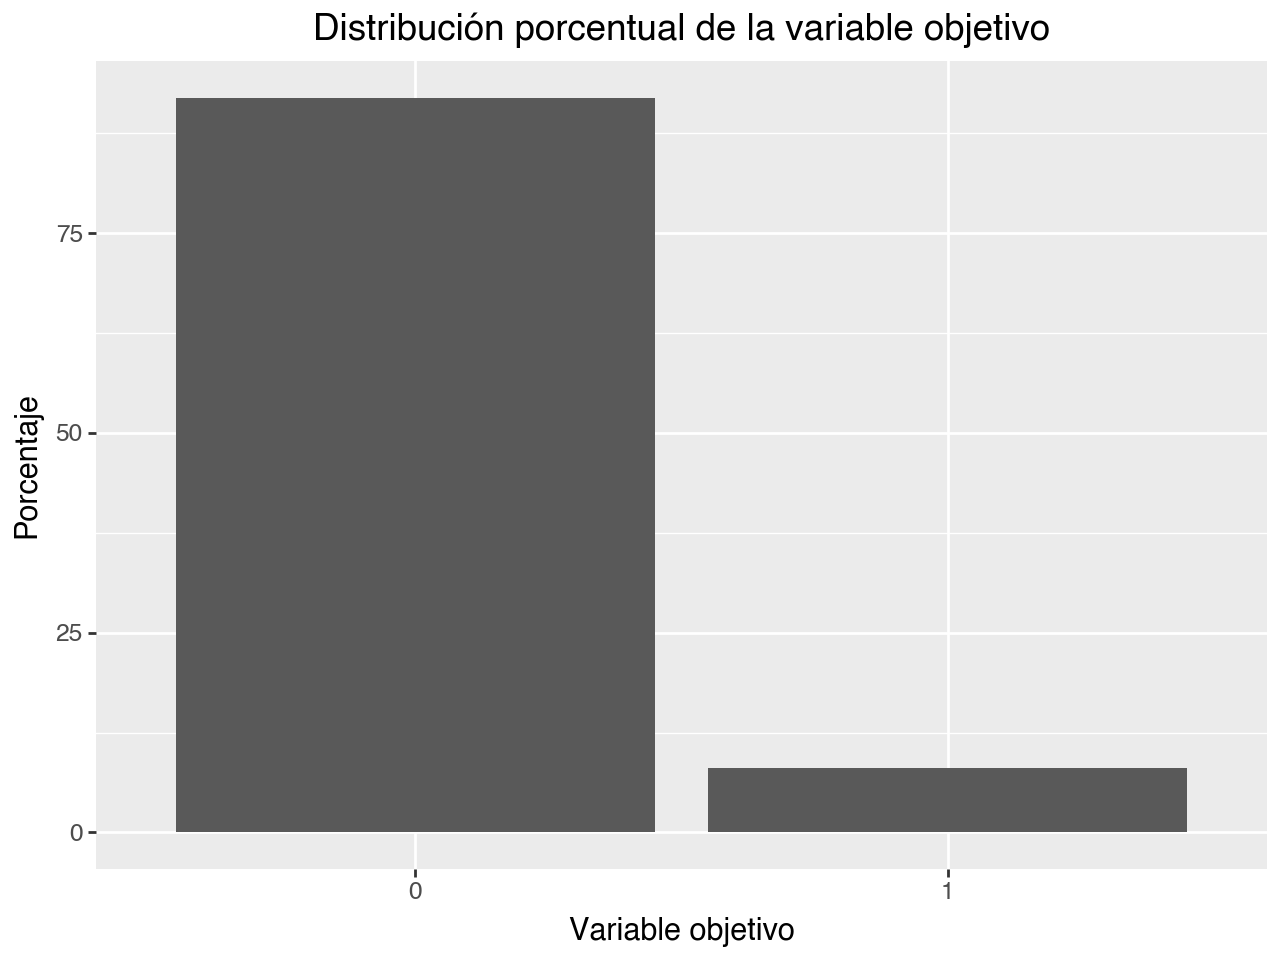

In [15]:
gg

A partir de la información anterior, se observa que el muestreo está desbalanceado, ya que la mayoría de los clientes no presentan dificultades para pagar el préstamo.

## Selección de threshold por filas y columnas para eliminar valores missing

Analizamos los valores nulos por fila y columna para decidir qué umbral aplicar y eliminar las filas o columnas con demasiados valores faltantes.

In [16]:
pd_series_null_columns = pd_loan.isnull().sum().sort_values(ascending=False)
pd_series_null_rows = pd_loan.isnull().sum(axis=1).sort_values(ascending=False)
print(pd_series_null_columns.shape, pd_series_null_rows.shape)

pd_null_columnas = pd.DataFrame(pd_series_null_columns, columns=['nulos_columnas'])     
pd_null_filas = pd.DataFrame(pd_series_null_rows, columns=['nulos_filas'])  

pd_null_columnas['porcentaje_columnas'] = pd_null_columnas['nulos_columnas']/pd_loan.shape[0]
pd_null_filas['porcentaje_filas']= pd_null_filas['nulos_filas']/pd_loan.shape[1]

(122,) (307511,)


In [17]:
pd_loan.shape

(307511, 122)

In [18]:
pd_null_columnas

,nulos_columnas,porcentaje_columnas
COMMONAREA_MEDI,214865,0.698723
COMMONAREA_AVG,214865,0.698723
COMMONAREA_MODE,214865,0.698723
NONLIVINGAPARTMENTS_MODE,213514,0.694330
NONLIVINGAPARTMENTS_AVG,213514,0.694330
NONLIVINGAPARTMENTS_MEDI,213514,0.694330
FONDKAPREMONT_MODE,210295,0.683862
LIVINGAPARTMENTS_MODE,210199,0.683550
LIVINGAPARTMENTS_AVG,210199,0.683550
LIVINGAPARTMENTS_MEDI,210199,0.683550


En este trabajo, he establecido un umbral del 80% para eliminar columnas con un exceso de valores faltantes, permitiendo conservar variables útiles y reducir el riesgo de sesgos derivados de imputaciones incorrectas.

Es crucial recordar que incluso columnas con una alta proporción de valores nulos (por ejemplo, entre un 60% y 70%) podrían contener información relevante que no deberíamos descartar sin una evaluación adecuada.

In [19]:
threshold=0.8
list_vars_not_null = list(pd_null_columnas[pd_null_columnas['porcentaje_columnas']<threshold].index)
pd_loan_filter_null = pd_loan.loc[:, list_vars_not_null]
pd_loan_filter_null.shape

(307511, 122)

In [20]:
pd_null_filas

,nulos_filas,porcentaje_filas
185713,61,0.5
133770,61,0.5
197736,61,0.5
116937,61,0.5
269492,61,0.5
...,...,...
129942,0,0.0
129929,0,0.0
129924,0,0.0
129911,0,0.0


Además, en esta sección también podríamos identificar si existen columnas duplicadas en el DataFrame. Esto permitiría detectar redundancias y optimizar el conjunto de datos

In [21]:
def duplicate_columns(frame):
    '''
    ----------------------------------------------------------------------------------------------------------
    Función duplicate_columns:
    ----------------------------------------------------------------------------------------------------------
    - Descripción:
        Esta función recibe un DataFrame y busca columnas duplicadas basándose en su contenido. Si dos 
        columnas tienen exactamente los mismos valores, se considera que una de ellas es duplicada.
        
    - Inputs: 
        - frame (DataFrame): DataFrame que contiene las columnas a evaluar.
        
    - Return:
        - dups (list): Lista con los nombres de las columnas duplicadas.
    '''
    
    # Agrupamos las columnas por su tipo de datos
    groups = frame.columns.to_series().groupby(frame.dtypes).groups
    dups = []
    
    # Recorremos cada grupo de columnas con el mismo tipo de dato
    for t, v in groups.items():

        cs = frame[v].columns
        vs = frame[v]
        lcs = len(cs)
        
        # Comparamos cada columna con las demás dentro del grupo
        for i in range(lcs):
            ia = vs.iloc[:,i].values
            for j in range(i+1, lcs):
                ja = vs.iloc[:,j].values
                if np.array_equal(ia, ja):
                    dups.append(cs[i])
                    break
    return dups

In [22]:
duplicate_cols = duplicate_columns(pd_loan)

In [23]:
duplicate_cols

[]

Esto confirma que no existen columnas duplicadas, por lo que no será necesario eliminar ninguna por esa razón.

## Tipos: Variables categoricas y continuas

Como mencioné anteriormente, los datos disponibles se dividen en tres tipos principales: enteros, numéricos de punto flotante y objetos. A partir de esta clasificación inicial, el objetivo es agrupar las variables en dos categorías principales: categóricas y numéricas.

Las variables categóricas son aquellas que representan grupos o categorías bien definidas, mientras que las numéricas, también conocidas como continuas, son valores que pueden medirse y abarcar un rango amplio, incluso infinito. Esta diferenciación es clave para orientar los análisis posteriores.

He decidido considerar los datos de tipo punto flotante como continuos, ya que suelen representar valores medibles. Soy consciente de que podría haber excepciones, pero debido a la imposibilidad de revisar cada caso individualmente, tomaré esta decisión inicial y, en caso de errores, los corregiré más adelante.

En cuanto a los datos de tipo objeto, los clasificaré como categóricos porque suelen representar texto o etiquetas, lo que encaja con la idea de categorías o grupos. Por último, los datos de tipo entero requieren un análisis más detallado. Algunas variables enteras pueden ser booleanas (es decir, tomar solo los valores 0 y 1), lo que las convierte en categóricas, mientras que otras pueden representar cantidades o mediciones y, por tanto, serán tratadas como continuas.

In [25]:
def dame_variables_categoricas(dataset=None):
    '''
    ----------------------------------------------------------------------------------------------------------
    Función dame_variables_categoricas:
    ----------------------------------------------------------------------------------------------------------
    - Descripción:
        Esta función recibe un DataFrame y devuelve una lista de las variables 
        categóricas (con pocos valores únicos).
        
    - Inputs: 
        - dataset (DataFrame): DataFrame que contiene los datos de entrada.
        
    - Return:
        - lista_variables_categoricas (list): Lista con los nombres de las variables 
          categóricas en el DataFrame.
        - other (list): Lista con los nombres de las variables que no cumplen los criterios 
          para ser categóricas.
        - 1 (int): Indica que la ejecución es incorrecta debido a la falta del 
          argumento 'dataset'.
    '''
    # Verificar que el DataFrame de entrada no sea nulo
    if dataset is None:
        print(u'\nError: Falta el argumento dataset en la función')
        return 1 
    
    lista_variables_categoricas = []  
    other = []  

    # Recorrer las columnas del DataFrame
    for i in dataset.columns:
        
        # Si la columna es de tipo objeto (posiblemente categórica)
        if dataset[i].dtype == object:
            unicos = int(len(np.unique(dataset[i].dropna(axis=0, how='all'))))
            if unicos < 100:
                lista_variables_categoricas.append(i)  
            else:
                other.append(i)  
                
        # Si la columna es de tipo entero                
        if dataset[i].dtype == int:
            unicos = int(len(np.unique(dataset[i].dropna(axis=0, how='all'))))
            if unicos < 20:
                lista_variables_categoricas.append(i)  
            else:
                other.append(i) 

    return lista_variables_categoricas, other

In [26]:
list_cat_vars, other = dame_variables_categoricas(dataset=pd_loan_filter_null)
# pd_loan_filter_null[list_cat_vars] = pd_loan_filter_null[list_cat_vars].astype("category")
pd_loan_filter_null[list_cat_vars].head()

,FONDKAPREMONT_MODE,WALLSMATERIAL_MODE,HOUSETYPE_MODE,EMERGENCYSTATE_MODE,OCCUPATION_TYPE,NAME_TYPE_SUITE,CNT_CHILDREN,FLAG_DOCUMENT_8,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_9,FLAG_DOCUMENT_21,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_OWN_REALTY,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_12,FLAG_PHONE,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,TARGET,REG_CITY_NOT_LIVE_CITY,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,WEEKDAY_APPR_PROCESS_START,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,FLAG_EMAIL,FLAG_CONT_MOBILE,ORGANIZATION_TYPE,FLAG_WORK_PHONE,FLAG_EMP_PHONE,FLAG_MOBIL,NAME_HOUSING_TYPE,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE
0,reg oper account,"Stone, brick",block of flats,No,Laborers,Unaccompanied,0,0,Cash loans,M,N,0,1,0,0,0,0,0,0,0,0,Y,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,WEDNESDAY,2,2,0,1,Business Entity Type 3,0,1,1,House / apartment,Single / not married,Secondary / secondary special,Working
1,reg oper account,Block,block of flats,No,Core staff,Family,0,0,Cash loans,F,N,0,1,0,0,0,0,0,0,0,0,N,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,MONDAY,1,1,0,1,School,0,1,1,House / apartment,Married,Higher education,State servant
2,NaN,NaN,NaN,NaN,Laborers,Unaccompanied,0,0,Revolving loans,M,Y,0,0,0,0,0,0,0,0,0,0,Y,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,MONDAY,2,2,0,1,Government,1,1,1,House / apartment,Single / not married,Secondary / secondary special,Working
3,NaN,NaN,NaN,NaN,Laborers,Unaccompanied,0,0,Cash loans,F,N,0,1,0,0,0,0,0,0,0,0,Y,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,WEDNESDAY,2,2,0,1,Business Entity Type 3,0,1,1,House / apartment,Civil marriage,Secondary / secondary special,Working
4,NaN,NaN,NaN,NaN,Core staff,Unaccompanied,0,1,Cash loans,M,N,0,0,0,0,0,0,0,0,0,0,Y,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,THURSDAY,2,2,0,1,Religion,0,1,1,House / apartment,Single / not married,Secondary / secondary special,Working


In [27]:
list_cat_vars

['FONDKAPREMONT_MODE',
 'WALLSMATERIAL_MODE',
 'HOUSETYPE_MODE',
 'EMERGENCYSTATE_MODE',
 'OCCUPATION_TYPE',
 'NAME_TYPE_SUITE',
 'CNT_CHILDREN',
 'FLAG_DOCUMENT_8',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_21',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_OWN_REALTY',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_12',
 'FLAG_PHONE',
 'LIVE_CITY_NOT_WORK_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'TARGET',
 'REG_CITY_NOT_LIVE_CITY',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'REG_REGION_NOT_LIVE_REGION',
 'WEEKDAY_APPR_PROCESS_START',
 'REGION_RATING_CLIENT_W_CITY',
 'REGION_RATING_CLIENT',
 'FLAG_EMAIL',
 'FLAG_CONT_MOBILE',
 'ORGANIZATION_TYPE',
 'FLAG_WORK_PHONE'

In [28]:
other

['HOUR_APPR_PROCESS_START',
 'DAYS_ID_PUBLISH',
 'DAYS_EMPLOYED',
 'DAYS_BIRTH',
 'SK_ID_CURR']

Más adelante profundizaremos en el análisis de la lista de variables `other`, que corresponde a variables enteras y continuas.

A continuación, analizo la distribución de algunas variables categóricas mediante el cálculo de frecuencias absolutas y relativas, lo que me permite entender mejor los patrones presentes en los datos. En este momento, se presentan solo algunos ejemplos representativos; en futuros notebooks se profundizará en el análisis de estas variables con más detalle.

In [29]:
pd_loan_filter_null['WALLSMATERIAL_MODE'].value_counts()

WALLSMATERIAL_MODE
Panel           66040
Stone, brick    64815
Block            9253
Wooden           5362
Mixed            2296
Monolithic       1779
Others           1625
Name: count, dtype: int64

In [30]:
pd_loan_filter_null['FONDKAPREMONT_MODE'].value_counts()

FONDKAPREMONT_MODE
reg oper account         73830
reg oper spec account    12080
not specified             5687
org spec account          5619
Name: count, dtype: int64

In [31]:
pd_loan_filter_null['NAME_CONTRACT_TYPE'].value_counts() 

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64

In [32]:
# Contamos la frecuencia relativa de los valores de la variable objetivo
pd_plot_target = pd_loan_filter_null['WALLSMATERIAL_MODE']\
        .value_counts(normalize=True)\
        .mul(100).rename('percent').reset_index()


# Contamos la frecuencia absoluta de los valores de la variable objetivo
pd_plot_target_conteo = pd_loan_filter_null['WALLSMATERIAL_MODE'].value_counts().reset_index()

# Combinamos las tablas anteriores
pd_plot_target_pc = pd.merge(pd_plot_target, pd_plot_target_conteo, on=['WALLSMATERIAL_MODE'], how='inner')
pd_plot_target_pc

,WALLSMATERIAL_MODE,percent,count
0,Panel,43.685917,66040
1,"Stone, brick",42.875571,64815
2,Block,6.120923,9253
3,Wooden,3.547000,5362
4,Mixed,1.518820,2296
5,Monolithic,1.176821,1779
6,Others,1.074949,1625


Tras un análisis general inicial, concluyo que no es necesario reprocesar las variables de tipo objeto, ya que no presentan porcentajes problemáticos, no mezclan valores categóricos con numéricos, ni muestran otras características que requieran tratamiento adicional.

Además, decido no guardar el DataFrame final, ya que no se han realizado modificaciones respecto a los datos originales.